**1**. (20 points)

Implement a Python function to find the minimum using the Newton-Raphson method. Use it to find a minimum of $x^3 + 4x^2 -3 = x$ given the initial location $x_0 = -1$. Do not use any library methods apart from those in `np` - the idea is to develop the algorithm using only basic Python language constructs.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
f = lambda x: x**3 + 4*x**2 - 3
f1 = lambda x: 3*x**2 + 8*x
f2 = lambda x: 6*x + 8

In [4]:
def newton(f, f1, f2, x0, tol=1e-6, max_iter=10):
    """Newton-Raphson minimization via root of function derivative."""
    
    x = x0
    for i in range(max_iter):
        fold = f(x)
        x = x - f1(x)/f2(x) 
        fnew = f(x)
        if np.abs(fnew - fold) < tol:
            return x
    return x

In [5]:
x = newton(f, f1, f2, -1)

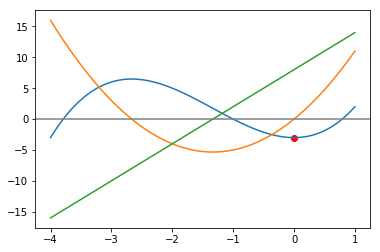

In [6]:
xp = np.linspace(-4, 1, 100)
plt.plot(xp, f(xp))
plt.plot(xp, f1(xp))
plt.plot(xp, f2(xp))
plt.axhline(0, c='gray')
plt.scatter([x], [f(x)], c='red')
pass

**2**. (20 points)

Find the minimum of the following quadratic function on $\mathbb{R}^2$ 

$$f(x) = x^TAx +b^Tx +c$$
where
$$A = \left(\begin{matrix}13&5\\5&7\end{matrix}\right), b = \left(\begin{matrix}1\\1\end{matrix}\right) \textrm {and } c = 2$$

Under the constraints:
$$g(x) = 2x_1-5x_2=2 \;\;\;\;\;\; \textrm{ and } \;\;\;\;\;\; h(x) = x_1+x_2=1$$

1. Use a matrix decomposition method to find the minimum of the *unconstrained* problem without using `scipy.optimize` (Use library functions - no need to code your own). Note: for full credit you should exploit matrix structure. (5 points)
2. Find the solution using constrained optimization with the `scipy.optimize` package. (5 points)
2. Use Lagrange multipliers and solving the resulting set of equations directly without using `scipy.optimize`. (10 points)

In [8]:
import scipy.linalg as la

In [9]:
A = np.array([[13,5],[5,7]])
b = np.array([1.0,1.0]).T
c = 2

la.cho_solve(la.cho_factor(A), -b/2)

array([-0.01515152, -0.06060606])

In [13]:
import scipy.optimize as opt

In [14]:
def f(x, A, b, c):
    return x.T.dot(A).dot(x) + b.T.dot(x) + c

# check unconstrained solution
usol = opt.minimize(f, [0,0], args=(A, b, c))
usol.x

array([-0.01515152, -0.06060606])

In [15]:
cons = ({'type': 'eq', 'fun': lambda x: 2*x[0] - 5*x[1] - 2},
        {'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1})

opt.minimize(f, [0,0], constraints=cons, args=(A, b, c))

     fun: 15.999999999999996
     jac: array([26.99999976, 11.00000024])
 message: 'Optimization terminated successfully.'
    nfev: 14
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.00000000e+00, 3.41607086e-16])

In [16]:
M = np.array([
    [26, 10, 2, 1],
    [10, 14, -5, 1],
    [2, -5, 0, 0],
    [1, 1, 0, 0]
])

y = np.array([-1, -1, 2, 1]).T

la.solve(M, y)

array([ 1.00000000e+00, -1.74944234e-16, -2.28571429e+00, -2.24285714e+01])

**3**. (20 points)

We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$ using gradient descent with RMSprop (no bias correction) and starting with an initial value of $\beta = \begin{bmatrix}1 & 1 & 1\end{bmatrix}$. Use a learning rate of 0.01 and 10,000 iterations. This should take a few seconds to complete. (15 points)

Plot the data and fitted curve using `matplotlib`. (5 points)

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [17]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])

In [18]:
def f(beta, x):
    """Model function."""
    
    return beta[0]*x**2 + beta[1]*x**3 + beta[2]*np.sin(x)

In [19]:
def res(beta, x, y):
    """Resdiual funciton."""
    return f(beta, x) - y

In [20]:
def gd(beta, x, y, f, grad, alpha=0.01):
    """Gradient descent."""
    
    v = 0
    for i in range(10000):
        v = 0.9 * v + 0.1 * grad(beta, x, y)**2 
        beta = beta - (alpha * grad(beta, x, y))/(np.sqrt(v) + 1e-8)
    return beta

In [21]:
def grad1(beta, x, y):
    """Gradient of function."""
    
    return np.array([
        np.sum(x**2 * res(beta, x, y)),
        np.sum(x**3 * res(beta, x, y)),
        np.sum(np.sin(x) * res(beta, x, y))
    ])

In [22]:
beta = gd(np.array([1,1,1]), x, y, f, grad1)
beta

array([ 2.98759014, -0.20383227, 10.19524689])

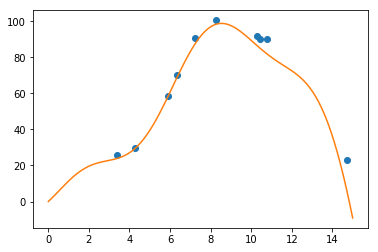

In [23]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

**Alternative gradient function**

In [24]:
def grad2(beta, X, y):
    """Gradient of function."""
    
    return X.T @ X @ beta - X.T @ y

In [25]:
x

array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])

In [26]:
X = np.c_[x**2, x**3, np.sin(x)]

beta = gd(np.array([1,1,1]), X, y, f, grad2)
beta

array([ 2.99759014, -0.19383227, 10.20524689])

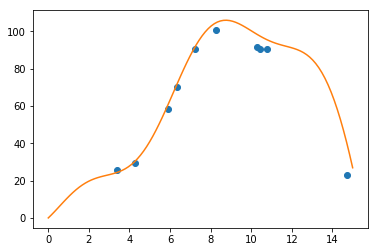

In [27]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

**4**. (20 points)

Given the set of vectors

```
v1 = np.array([1,2,3])
v2 = np.array([2,4,7])
v3 = np.array([1,0,1])
```

1. Calculate the pairwise Euclidean distance matrix  (5 points)
2. Find an orthogonal basis for the space spanned by the vectors $v_1, v_2, v_3$ without using any functions from `numpy.linag` or `scipy.linalg` (5 points)
3. Use Gram-Schmidt decomposition to  find an orthogonal basis for the space spanned by the vectors $v_1, v_2, v_3$ where one of the basis vectors must be in the direction of $v_3$. (10 points)

In [28]:
v1 = np.array([1,2,3])
v2 = np.array([2,4,7])
v3 = np.array([1,0,1])

def dist(u, v):
    w = u - v
    return np.sqrt(np.sum(w**2))

D = np.array([[dist(u1, u2) for u1 in [v1, v2, v3]] for u2 in [v1, v2, v3]])
D

array([[0.        , 4.58257569, 2.82842712],
       [4.58257569, 0.        , 7.28010989],
       [2.82842712, 7.28010989, 0.        ]])

In [29]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [30]:
def proj(u, v):
    """Find projection of u on v."""
    
    return (u.T @ v)/(v.T @ v) * v

In [31]:
u1 = v3
u2 = v1 - proj(v1, u1)
u3 = v2 - proj(v2, u1) - proj(v2, u2)

In [32]:
B = np.c_[
    u1 / np.linalg.norm(u1),
    u2 / np.linalg.norm(u2), 
    u3 / np.linalg.norm(u3)
]

In [33]:
B @ B.T

array([[ 1.00000000e+00, -3.33066907e-16, -3.88578059e-16],
       [-3.33066907e-16,  1.00000000e+00,  3.33066907e-16],
       [-3.88578059e-16,  3.33066907e-16,  1.00000000e+00]])

**5**. (20 points)

Recall that a covariance matrix is a matrix whose entries are

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/4df2969e65403dd04f2c64137d21ff59b5f54190)

1. Find the sample covariance matrix of the 4 features of the **iris** data set at http://bit.ly/2ow0oJO using basic `numpy` operations on `ndarrasy`. Do **not** use the `np.cov` or equivalent functions in `pandas` (except for checking). Remember to scale by $1/(n-1)$ for the sample covariance. (10 points)
2. Plot the first 2 principal components of the `iris` data by using eigendecoposition, coloring each data point by the species (10 points)

In [34]:
import pandas as pd

In [35]:
url = 'http://bit.ly/2ow0oJO'
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
X = iris.values[:, :4].astype('float')

In [37]:
X -= X.mean(axis=0)

In [38]:
C = (X.T @ X)/(X.shape[0]-1)
C

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

**Check**

In [39]:
np.cov(X, rowvar=False)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [40]:
e, v = np.linalg.eigh(C)

In [41]:
e

array([0.02368303, 0.07852391, 0.24224357, 4.22484077])

In [42]:
v

array([[ 0.31725455,  0.58099728,  0.65653988, -0.36158968],
       [-0.32409435, -0.59641809,  0.72971237,  0.08226889],
       [-0.47971899, -0.07252408, -0.1757674 , -0.85657211],
       [ 0.75112056, -0.54906091, -0.07470647, -0.35884393]])

In [43]:
idx = np.argsort(e)[::-1]

In [44]:
pc = v[:, idx[:2]]

In [45]:
pc

array([[-0.36158968,  0.65653988],
       [ 0.08226889,  0.72971237],
       [-0.85657211, -0.1757674 ],
       [-0.35884393, -0.07470647]])

In [46]:
p1, p2 = pc.T @ X.T

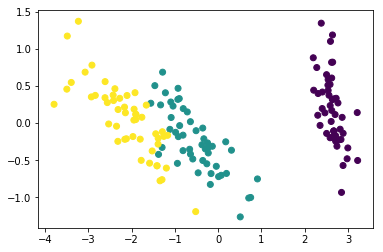

In [47]:
plt.scatter(p1, p2, c=iris.species.astype('category').cat.codes)
pass

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)

In [50]:
y = pca.fit_transform(X)

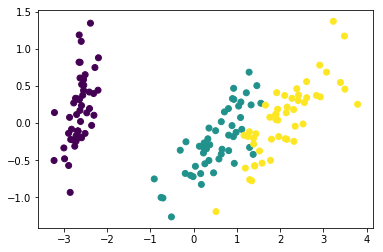

In [51]:
plt.scatter(y[:, 0], y[:, 1], c=iris.species.astype('category').cat.codes)
pass